In [118]:
!pip install plotly

In [120]:
!pip install cufflinks

     |████████████████████████████████| 81 kB 503 kB/s eta 0:00:01
     |████████████████████████████████| 121 kB 1.6 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 2.9 MB/s eta 0:00:01     |██████████▏                     | 706 kB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 243 kB 2.8 MB/s eta 0:00:01
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=67921 sha256=1217e45222ec298f0f2ad8cea62db6038a7abbc5ec8434a725bb53769825f27d
  Stored in directory: /opt/ml/.cache/pip/wheels/e1/27/13/3fe67fa7ea7be444b831d117220b3b586b872c9acd4df480d0
Successfully built cufflinks


In [165]:
!pip install gensim

     |████████████████████████████████| 23.9 MB 21.4 MB/s eta 0:00:01
     |████████████████████████████████| 56 kB 7.6 MB/s  eta 0:00:01


In [126]:
import plotly
import cufflinks
cufflinks.go_offline(connected=True)

In [1]:
import gensim

/opt/conda/lib/python3.7/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
check_case = ["ADJUST", "ADJUST2", "BANK CHARGES", "C2", "CRUK", "D", "DOT", "M", "PADS", "POST", "SP1002", "TEST001", "TEST002"]

In [4]:
train_csv = pd.read_csv("/opt/ml/code/input/train.csv")

In [5]:
train_csv.head()

,order_id,product_id,description,quantity,order_date,price,customer_id,country,total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,11.4675,13085,United Kingdom,137.61
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,11.1375,13085,United Kingdom,133.65
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,11.1375,13085,United Kingdom,133.65
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,3.4650,13085,United Kingdom,166.32
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,2.0625,13085,United Kingdom,49.50


In [6]:
train_csv.describe(include="all")

,order_id,product_id,description,quantity,order_date,price,customer_id,country,total
count,780502,780502,780502,780502.000000,780502,780502.000000,780502.000000,780502,780502.000000
unique,43955,4645,5297,NaN,40615,NaN,NaN,41,NaN
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-11-14 15:27:00,NaN,NaN,United Kingdom,NaN
freq,542,5096,5096,NaN,543,NaN,NaN,700317,NaN
mean,NaN,NaN,NaN,12.623307,NaN,6.140931,15313.393466,NaN,33.715373
std,NaN,NaN,NaN,143.906302,NaN,119.042266,1695.765797,NaN,274.207403
min,NaN,NaN,NaN,-74215.000000,NaN,0.000000,12346.000000,NaN,-127352.940000
25%,NaN,NaN,NaN,2.000000,NaN,2.062500,13963.000000,NaN,7.260000
50%,NaN,NaN,NaN,5.000000,NaN,3.217500,15239.000000,NaN,19.470000
75%,NaN,NaN,NaN,12.000000,NaN,6.187500,16788.000000,NaN,32.175000


# 어떤 상품이 가장 많이 팔리는가?

In [7]:
train_csv_valid_prod = train_csv[[(prod_id not in check_case) for prod_id in train_csv["product_id"]]]

In [21]:
train_csv_valid_prod.head()

,order_id,product_id,description,quantity,order_date,price,customer_id,country,total,prod_unique_id,y_m_d,y_m
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,11.4675,13085,United Kingdom,137.61,85048,2009-12-01,2009-12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,11.1375,13085,United Kingdom,133.65,79323,2009-12-01,2009-12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,11.1375,13085,United Kingdom,133.65,79323,2009-12-01,2009-12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,3.4650,13085,United Kingdom,166.32,22041,2009-12-01,2009-12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,2.0625,13085,United Kingdom,49.50,21232,2009-12-01,2009-12


In [22]:
len(train_csv_valid_prod) # 기존 데이터는 780502개의 행 보유

776913

In [23]:
train_csv_valid_prod.product_id

0          85048
1         79323P
2         79323W
3          22041
4          21232
           ...  
780497     22197
780498     23146
780499     84946
780500     85048
780501     23490
Name: product_id, Length: 776913, dtype: object

In [11]:
train_csv_valid_prod["prod_unique_id"] = [int(elem[:5]) if len(elem)>=6 else int(elem) for elem in train_csv_valid_prod.product_id]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
train_csv_valid_prod.head()

,order_id,product_id,description,quantity,order_date,price,customer_id,country,total,prod_unique_id
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,11.4675,13085,United Kingdom,137.61,85048
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,11.1375,13085,United Kingdom,133.65,79323
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,11.1375,13085,United Kingdom,133.65,79323
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,3.4650,13085,United Kingdom,166.32,22041
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,2.0625,13085,United Kingdom,49.50,21232


In [13]:
order_date = train_csv_valid_prod['order_date'].copy()

In [14]:
y_m_d = [date_info[:10] for date_info in order_date]
y_m = [date_info[:7] for date_info in order_date]

train_csv_valid_prod["y_m_d"] = y_m_d
train_csv_valid_prod["y_m"] = y_m

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [15]:
train_csv_valid_prod.head()

,order_id,product_id,description,quantity,order_date,price,customer_id,country,total,prod_unique_id,y_m_d,y_m
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,11.4675,13085,United Kingdom,137.61,85048,2009-12-01,2009-12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,11.1375,13085,United Kingdom,133.65,79323,2009-12-01,2009-12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,11.1375,13085,United Kingdom,133.65,79323,2009-12-01,2009-12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,3.4650,13085,United Kingdom,166.32,22041,2009-12-01,2009-12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,2.0625,13085,United Kingdom,49.50,21232,2009-12-01,2009-12


In [16]:
product_sum = train_csv_valid_prod.groupby("prod_unique_id").sum()

In [17]:
product_sum

,quantity,price,customer_id,total
prod_unique_id,,,,
10002,7256,428.0100,4633661,9495.2880
10080,303,22.6875,430314,205.6065
10109,4,0.6930,14159,2.7720
10120,612,21.4830,989559,212.0580
10123,1620,60.4560,952895,503.5140
...,...,...,...,...
90209,736,191.1525,903899,2238.3900
90210,387,195.3600,709352,1216.9575
90211,23,137.4450,208433,225.8025


In [18]:
quantity_df = product_sum.quantity

In [19]:
quantity_df

prod_unique_id
10002    7256
10080     303
10109       4
10120     612
10123    1620
         ... 
90209     736
90210     387
90211      23
90212      29
90214     969
Name: quantity, Length: 3873, dtype: int64

In [20]:
quantity_df = quantity_df.sort_values()
quantity_df

prod_unique_id
20879       -46
21701       -12
35976       -11
22003       -10
79301        -8
          ...  
84879     76481
85123     87382
21212     88552
84077    102142
85099    154812
Name: quantity, Length: 3873, dtype: int64

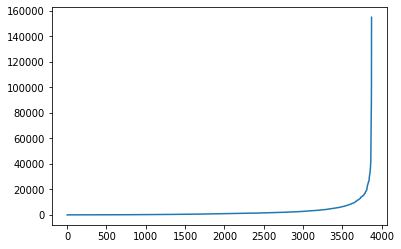

In [71]:
plt.plot(quantity_df.values)

In [252]:
cut_val = 0
print(f"total data: {len(quantity_df)}\n\t\tover {cut_val}\t\t=>\t{sum(quantity_df>cut_val)}")

total data: 3873
		over 0		=>	3843


In [73]:
quantity_df.describe()

count      3873.000000
mean       2542.443067
std        6061.831268
min         -46.000000
25%         191.000000
50%         826.000000
75%        2380.000000
max      154812.000000
Name: quantity, dtype: float64

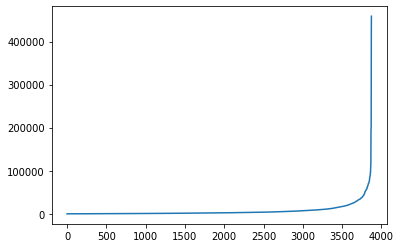

In [74]:
plt.plot(total_df.values)

In [253]:
cut_val = 0
print(f"total data: {len(total_df)}\n\t\tover {cut_val}\t\t=>\t{sum(total_df>cut_val)}")

total data: 3873
		over 0		=>	3844


In [76]:
total_df.describe()

count      3873.000000
mean       6825.138951
std       17745.609744
min        -279.015000
25%         700.920000
50%        2163.117000
75%        6180.405000
max      458691.205500
Name: total, dtype: float64

In [79]:
top_10_total = total_df[-10:]
top_10_total

prod_unique_id
22386    109068.8115
79321    109465.6695
22086    118032.6840
15056    178462.1520
84997    195448.8195
47566    200283.4845
84879    200693.4765
85123    388881.5205
22423    423526.3230
85099    458691.2055
Name: total, dtype: float64

In [87]:
top_10_total.keys()

Int64Index([22386, 79321, 22086, 15056, 84997, 47566, 84879, 85123, 22423,
            85099],
           dtype='int64', name='prod_unique_id')

## 시간에 따라 상품 판매량

In [122]:
time_product = train_csv_valid_prod.groupby(['prod_unique_id', 'y_m']).sum()
time_product

quantity    price  customer_id      total
prod_unique_id y_m                                               
10002          2009-12       212  23.8425       250817   297.3300
               2010-01       289  21.0375       232547   405.3225
               2010-02       255  18.2325       191851   357.6375
               2010-03       633  21.5820       240097   791.6865
               2010-04       929  29.5680       333879  1146.3375
...                          ...      ...          ...        ...
90214          2011-06        23  24.7500       175587    47.4375
               2011-07        75  24.7500       198497   154.6875
               2011-09         1   2.0625        14606     2.0625
               2011-10         4   6.1875        43818     8.2500
               2011-11        78  30.9375       240820   160.8750

[52426 rows x 4 columns]

In [100]:
time_product.index

MultiIndex([(10002, '2009-12'),
            (10002, '2010-01'),
            (10002, '2010-02'),
            (10002, '2010-03'),
            (10002, '2010-04'),
            (10002, '2010-05'),
            (10002, '2010-06'),
            (10002, '2010-07'),
            (10002, '2010-08'),
            (10002, '2010-09'),
            ...
            (90214, '2011-01'),
            (90214, '2011-02'),
            (90214, '2011-03'),
            (90214, '2011-04'),
            (90214, '2011-05'),
            (90214, '2011-06'),
            (90214, '2011-07'),
            (90214, '2011-09'),
            (90214, '2011-10'),
            (90214, '2011-11')],
           names=['prod_unique_id', 'y_m'], length=52426)

In [115]:
def get_timeseries_graph_by_prod_id(prod_id):
    data_filtered = time_product.xs(prod_id)
    plt.plot(data_filtered.index, data_filtered.total, label=str(prod_id))
    

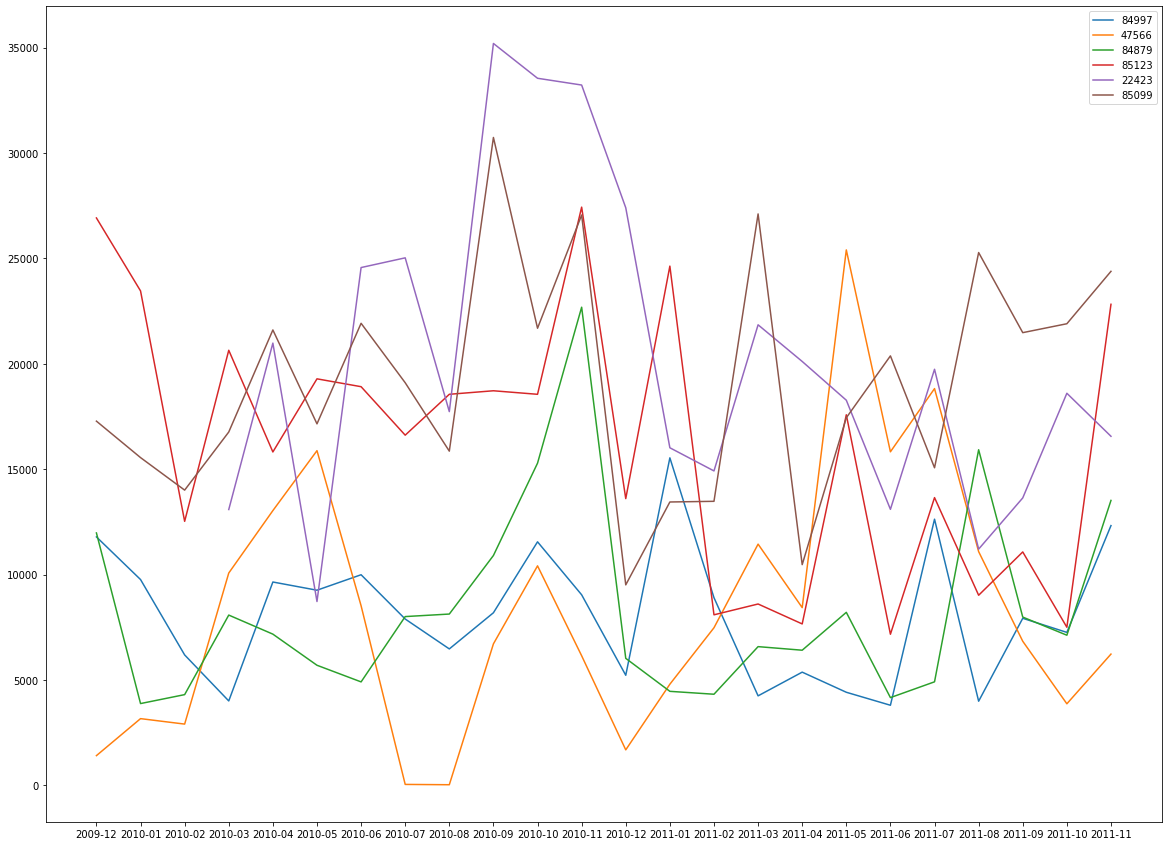

In [130]:
# [22386, 79321, 22086, 15056, 84997, 47566, 84879, 85123, 22423, 85099]
plt.figure(figsize=(20, 15))
for i in [84997, 47566, 84879, 85123, 22423, 85099]:
    get_timeseries_graph_by_prod_id(i)
    plt.legend()

## 도매상 찾기

In [26]:
monthly_customer = train_csv_valid_prod.groupby(['customer_id', 'y_m'])['total'].sum()

In [33]:
customer_total = train_csv_valid_prod.groupby('customer_id')['total'].sum()

In [34]:
customer_total = customer_total.sort_values()

In [36]:
customer_total[-5:]

customer_id
17450    382934.4915
14911    415298.4990
14156    491328.7665
14646    843933.2880
18102    935423.1150
Name: total, dtype: float64

In [44]:
print(monthly_customer.xs(18102))
print(monthly_customer.xs(14646))
print(monthly_customer.xs(14156))
print(monthly_customer.xs(14911))

y_m
2009-12    67659.4710
2010-01    63616.2450
2010-02    37493.6100
2010-03    35004.9315
2010-04    27384.3075
2010-05    21737.5125
2010-06    25326.8730
2010-07    84689.4015
2010-08    76752.0435
2010-10    49822.6740
2010-11    36452.6415
2010-12    45927.1065
2011-02    17383.5420
2011-03    11400.3780
2011-04     1974.9840
2011-05    29973.4710
2011-06    69233.0760
2011-07    37867.1040
2011-08     1626.7680
2011-09    81876.5970
2011-10    86924.0955
2011-11    25296.2820
Name: total, dtype: float64
y_m
2009-12    24075.9255
2010-01    47631.0780
2010-02    27411.2685
2010-03    38420.1510
2010-04     5632.2915
2010-05    29703.3000
2010-06    38767.6080
2010-07     6153.9390
2010-08    38002.6020
2010-09    70260.2835
2010-10    26512.6620
2010-11    50729.6790
2010-12    14151.8520
2011-01    43686.5220
2011-02    37368.3090
2011-03    35190.2100
2011-04     4762.8240
2011-05    46596.2310
2011-06    41726.8335
2011-07       18.1830
2011-08    65946.8865
2011-09    43990.1

In [50]:
print(monthly_customer.xs(18102).index)

Index(['2009-12', '2010-01', '2010-02', '2010-03', '2010-04', '2010-05',
       '2010-06', '2010-07', '2010-08', '2010-10', '2010-11', '2010-12',
       '2011-02', '2011-03', '2011-04', '2011-05', '2011-06', '2011-07',
       '2011-08', '2011-09', '2011-10', '2011-11'],
      dtype='object', name='y_m')


In [51]:
monthly_customer.xs(14646).index

Index(['2009-12', '2010-01', '2010-02', '2010-03', '2010-04', '2010-05',
       '2010-06', '2010-07', '2010-08', '2010-09', '2010-10', '2010-11',
       '2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05',
       '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11'],
      dtype='object', name='y_m')

In [53]:
test_14646 = monthly_customer.xs(14646)

In [54]:
test_14646['2009-12']

24075.925499999998

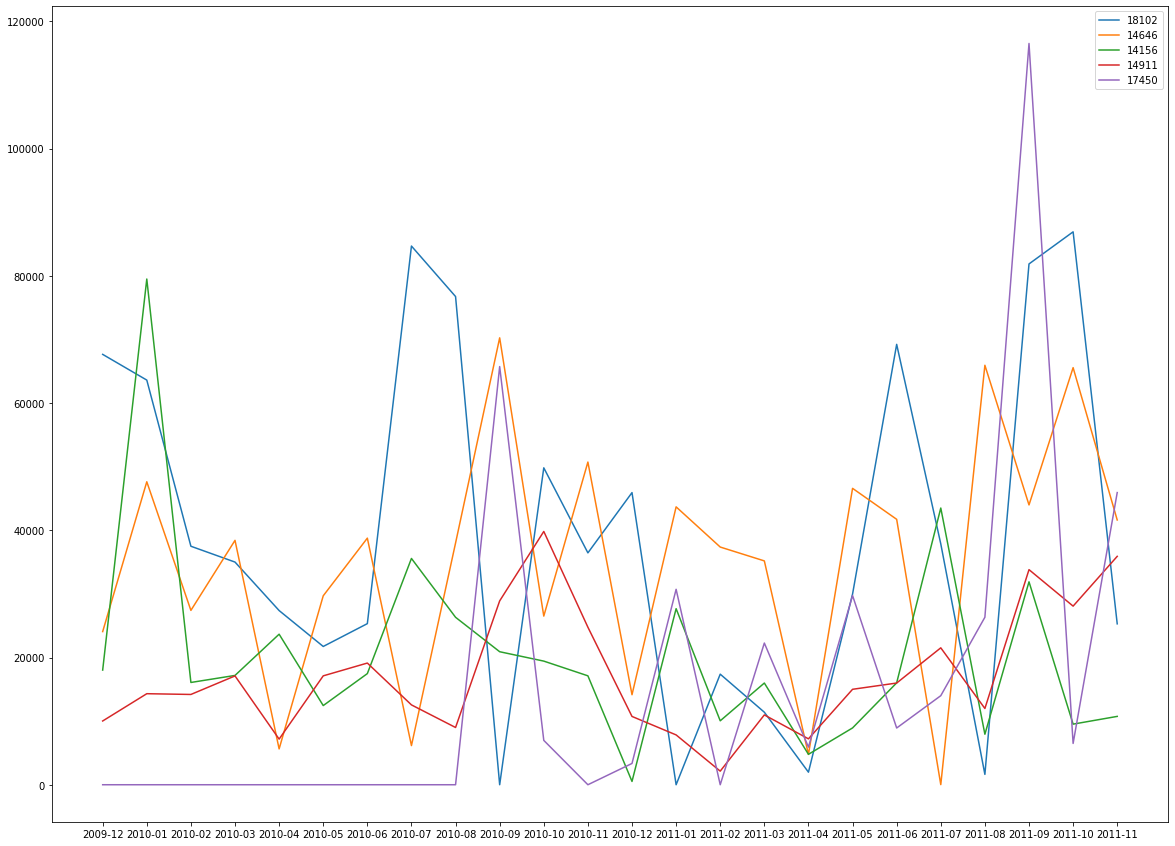

In [55]:
plt.figure(figsize=(20, 15))

def plot_monthly_total(customer_id_list):
    index_list = [
        '2009-12', '2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06', '2010-07', '2010-08', '2010-09', '2010-10', '2010-11',
        '2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11'
    ]
    for cust_id in customer_id_list:
        now_data = []
        monthly_pd = monthly_customer.xs(cust_id)
        for idx in index_list:
            try:
                indexed_d = monthly_pd[idx]
                now_data.append(indexed_d)
            except:
                now_data.append(0)
        plt.plot(index_list, now_data, label=str(cust_id))
    plt.legend()

        
plot_monthly_total([18102, 14646, 14156, 14911, 17450])


## 같이 발생하는 구매 품목(co-occurrence)

### gensim을 이용한 word2vec

In [56]:
order_list = train_csv_valid_prod['order_id'].copy()

In [57]:
order_list = list(set(order_list))

In [58]:
len(order_list)

42967

In [265]:
type(order_list[0])

str

In [266]:
order_dict = {}
for idx in order_list:
    order_dict[idx] = []

In [150]:
for i, prod_id in enumerate(train_csv_valid_prod['prod_unique_id']):
    print(train_csv_valid_prod['order_id'][i])
    print(type(train_csv_valid_prod['order_id'][i]))
    break

489434
<class 'str'>


In [151]:
error_info = []

for i, zip_out in enumerate(zip(train_csv_valid_prod['order_id'], train_csv_valid_prod['prod_unique_id'])):
    order_id, prod_id = zip_out
    try:
        order_dict[order_id].append(prod_id)
    except:
        error_info.append((order_id, prod_id))

In [152]:
error_info

[]

In [154]:
order_detail_list = [(k, v) for k, v in order_dict.items()]
max_len_order = max(order_detail_list, key=lambda x: len(x[1]))
len(max_len_order[1])

541

In [167]:
order_co_occur = [x[1] for x in order_detail_list]

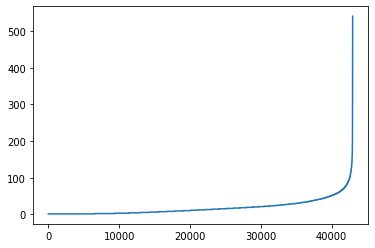

In [258]:
order_len_list = [len(x[1]) for x in order_detail_list]
order_len_list.sort()

plt.plot(order_len_list)

(array([3.3929e+04, 6.4970e+03, 1.7010e+03, 5.2300e+02, 1.8400e+02,
        7.3000e+01, 2.2000e+01, 1.2000e+01, 7.0000e+00, 5.0000e+00,
        3.0000e+00, 0.0000e+00, 2.0000e+00, 3.0000e+00, 1.0000e+00,
        1.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([  1.,  28.,  55.,  82., 109., 136., 163., 190., 217., 244., 271.,
        298., 325., 352., 379., 406., 433., 460., 487., 514., 541.]),
 <a list of 20 Patch objects>)

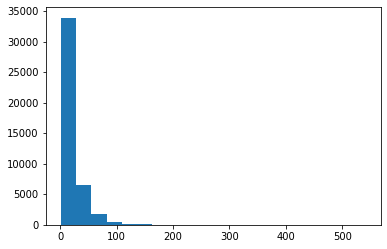

In [259]:
plt.hist(order_len_list, bins=20)

In [260]:
order_len_list = pd.Series(order_len_list)
order_len_list.describe()

count    42967.000000
mean        18.081621
std         22.004954
min          1.000000
25%          3.000000
50%         12.000000
75%         24.000000
max        541.000000
dtype: float64

In [261]:
for i in range(0, 11):
    print(f"order size larger than {i*50}:\t\t=>\t{(order_len_list>(i*50)).sum()}")

order size larger than 0:		=>	42967
order size larger than 50:		=>	3044
order size larger than 100:		=>	419
order size larger than 150:		=>	84
order size larger than 200:		=>	30
order size larger than 250:		=>	17
order size larger than 300:		=>	11
order size larger than 350:		=>	10
order size larger than 400:		=>	5
order size larger than 450:		=>	2
order size larger than 500:		=>	2


In [212]:
w2v = gensim.models.Word2Vec(order_co_occur, window=541)

In [207]:
test_sim = w2v.wv.most_similar(85099, topn=30)
print(test_sim)

[(21929, 0.8845006227493286), (21931, 0.8674982190132141), (20711, 0.8595038056373596), (22386, 0.8586928248405457), (21928, 0.8524977564811707), (22411, 0.8474306464195251), (20713, 0.8398905992507935), (22385, 0.8067666292190552), (21930, 0.7985820770263672), (22663, 0.7276152968406677), (20712, 0.7208003997802734), (23203, 0.6445945501327515), (22381, 0.6213219165802002), (22379, 0.612568199634552), (21033, 0.6106753349304199), (23200, 0.5866789221763611), (22380, 0.5817628502845764), (23201, 0.5697305798530579), (20718, 0.5654586553573608), (23202, 0.5654529333114624), (20717, 0.5393975973129272), (23199, 0.5392966270446777), (21428, 0.5132777690887451), (22377, 0.5029512643814087), (22356, 0.4981619119644165), (21936, 0.4916048049926758), (22384, 0.4845964014530182), (20724, 0.48337477445602417), (22189, 0.4612831771373749), (22355, 0.4585167467594147)]


In [208]:
def cal_co_occur(prod_id):
    co_occur_cnt = {}
    for i in order_co_occur:
        if prod_id in i:
            for j in i:
                try:
                    co_occur_cnt[j] += 1
                except:
                    co_occur_cnt[j] = 1
    co_occur_list = [(k, v) for k, v in co_occur_cnt.items()]
    co_occur_list = sorted(co_occur_list, key = lambda x: x[1], reverse=True)
    return co_occur_list

In [209]:
test_85099 = cal_co_occur(85099)

In [210]:
test_85099[:10]

[(85099, 6338),
 (22386, 1328),
 (21931, 1163),
 (22411, 1043),
 (20725, 1038),
 (84997, 927),
 (21929, 878),
 (21928, 862),
 (85123, 855),
 (22383, 736)]

In [211]:
for i in range(1, 11):
    for j in range(30):
        if test_85099[i][0] == test_sim[j][0]:
            print(f"{test_85099[i][0]} is founded.")
            break
        

22386 is founded.
21931 is founded.
22411 is founded.
21929 is founded.
21928 is founded.
22384 is founded.


### glove로 표현하기

In [215]:
!pip install glove-python-binary

     |████████████████████████████████| 948 kB 520 kB/s eta 0:00:01


In [216]:
import glove

In [217]:
order_co_occur[0]

[22780, 22892, 22632]

In [218]:
# order_co_occur: 공기정보를 추출할 수 있는 리스트의 리스트
# window: 윈도우 사이즈

corpus = glove.Corpus()
corpus.fit(order_co_occur, window=542)

In [221]:
corpus.matrix

<3873x3873 sparse matrix of type '<class 'numpy.float64'>'
	with 4352579 stored elements in COOrdinate format>

In [223]:
# no_components: 임베딩 차원
# learning_rage: 학습률
# epochs: 학습시킬 이퍽 수
# no_threads: 사용 스레드 갯수


res_glove = glove.Glove(no_components=128, learning_rate = 1e-3)
res_glove.fit(corpus.matrix, epochs=50, no_threads=2)

In [224]:
corpus.dictionary

{22780: 0,
 22892: 1,
 22632: 2,
 20713: 3,
 22668: 4,
 22185: 5,
 37476: 6,
 22130: 7,
 20749: 8,
 47599: 9,
 21667: 10,
 22580: 11,
 22837: 12,
 22941: 13,
 21809: 14,
 21810: 15,
 21811: 16,
 22616: 17,
 22944: 18,
 48185: 19,
 48184: 20,
 21524: 21,
 20685: 22,
 22191: 23,
 85099: 24,
 48111: 25,
 48194: 26,
 21936: 27,
 21937: 28,
 22411: 29,
 20728: 30,
 22383: 31,
 22384: 32,
 22636: 33,
 22634: 34,
 22417: 35,
 21213: 36,
 21977: 37,
 22951: 38,
 23307: 39,
 23309: 40,
 84991: 41,
 21210: 42,
 21974: 43,
 23306: 44,
 22416: 45,
 84987: 46,
 22949: 47,
 84988: 48,
 21972: 49,
 22423: 50,
 22844: 51,
 22852: 52,
 22180: 53,
 20914: 54,
 22278: 55,
 20726: 56,
 20725: 57,
 22328: 58,
 22752: 59,
 22801: 60,
 22842: 61,
 22840: 62,
 22798: 63,
 22782: 64,
 22783: 65,
 22511: 66,
 22512: 67,
 22223: 68,
 22222: 69,
 22108: 70,
 21112: 71,
 21111: 72,
 21110: 73,
 21109: 74,
 85184: 75,
 85173: 76,
 85174: 77,
 85059: 78,
 85054: 79,
 20802: 80,
 85036: 81,
 85035: 82,
 85034: 83,
 8

In [225]:
res_glove.add_dictionary(corpus.dictionary)

In [226]:
corpus_dict_to_name = {}

for zip_label in zip(train_csv_valid_prod['prod_unique_id'], train_csv_valid_prod['description']):
    corpus_dict_to_name[zip_label[0]] = zip_label[1]

In [241]:
test_sim02 = res_glove.most_similar(85099, number=21)
test_sim02

[(20725, 0.9982076287823266),
 (20727, 0.9971685532451882),
 (22383, 0.9970793814058561),
 (22384, 0.9969513834197969),
 (20728, 0.996945033725444),
 (22382, 0.9969320166460415),
 (22379, 0.9966126674603653),
 (20724, 0.9963685467177699),
 (20726, 0.9962111407889173),
 (22411, 0.9959241234412444),
 (20718, 0.9959052421973006),
 (22356, 0.9956619951754525),
 (21931, 0.9955715053706568),
 (22355, 0.9955139674646932),
 (21936, 0.9952461319599799),
 (22386, 0.9951700968252872),
 (20719, 0.9951236408178824),
 (22381, 0.9944842740735105),
 (20723, 0.9943837389325562),
 (22662, 0.9937528326771873)]

In [235]:
test_85099 = cal_co_occur(85099)
test_85099[:30]

[(85099, 6338),
 (22386, 1328),
 (21931, 1163),
 (22411, 1043),
 (20725, 1038),
 (84997, 927),
 (21929, 878),
 (21928, 862),
 (85123, 855),
 (22383, 736),
 (22384, 731),
 (20727, 711),
 (21930, 678),
 (22385, 661),
 (20728, 660),
 (20724, 654),
 (20713, 638),
 (20712, 609),
 (22382, 585),
 (21212, 570),
 (23203, 562),
 (85049, 537),
 (20726, 529),
 (47566, 503),
 (22379, 471),
 (22356, 470),
 (20914, 468),
 (20711, 457),
 (22423, 449),
 (20723, 445)]

In [267]:
for i in range(1, 11):
    for j in range(20):
        if test_85099[i][0] == test_sim02[j][0]:
            print(f"{test_85099[i][0]} is founded.")
            break
        

22386 is founded.
21931 is founded.
22411 is founded.
20725 is founded.
22383 is founded.
22384 is founded.
